In [237]:
import urllib.request
import json
import pandas as pd
# 模拟浏览器发送请求
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
    AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"
}

# 下载静态json文件
# http://stockpage.10jqka.com.cn/600016/field/
# 股票代码	股票简称	排名	每股收益(元)	每股净资产(元)	每股现金流(元)	净利润(元)	营业总收入(元)	总资产(元)	净资产收益率	股东权益比率	销售毛利率	总股本(股)
# 600036	招商银行	1	5.260	32.71	22.61	1380.00亿	3448.00亿	10.14万亿	17.06%	9.412%	0.00%	245.40亿
# 601166	兴业银行	2	4.200	31.79	-16.59	913.80亿	2224.00亿	9.27万亿	13.85%	8.172%	0.00%	207.70亿
# 000001	平安银行	3	2.200	18.80	6.930	455.20亿	1799.00亿	5.32万亿	12.36%	8.168%	0.00%	194.10亿
# 600000	浦发银行	4	1.560	20.03	12.44	511.70亿	1886.00亿	8.70万亿	7.980%	8.120%	0.00%	293.50亿
# 600015	华夏银行	5	1.430	16.37	4.960	250.40亿	938.10亿	3.90万亿	9.000%	8.290%	0.00%	153.90亿
# 601998	中信银行	6	1.170	11.25	3.990	621.00亿	2114.00亿	8.55万亿	10.80%	8.024%	0.00%	489.30亿
# 601818	光大银行	7	0.7400	7.460	-1.040	448.10亿	1516.00亿	6.30万亿	10.27%	8.095%	0.00%	540.30亿
# 600016	民生银行	8	0.7100	11.53	3.800	352.70亿	1425.00亿	7.26万亿	6.310%	8.446%	0.00%	437.80亿
# 601916	浙商银行	9	0.5600	6.490	7.888	136.20亿	610.90亿	2.62万亿	9.010%	6.329%	0.00%	212.70亿

bankidlist=['600036','601166','000001','600000','600015','601998','601818','600016','601916']
banknmlist=["招商银行","兴业银行","平安银行","浦发银行","华夏银行","中信银行","光大银行","民生银行","浙商银行"]


def bankdata(bankid,banknm):
    url = "http://basic.10jqka.com.cn/api/stock/finance/" + bankid + "_bank.json"

    request = urllib.request.Request(url, headers=headers)
    response = urllib.request.urlopen(request)
    # data = response.read().decode("unicode_escape").encode().decode("unicode_escape")
    data1 = response.read()
    # 解析json数据
    json_data = json.loads(data1)
    json.loads(json_data['fieldflashData'])

    #pd.DataFrame(json.loads(json_data['fieldflashData'])["report"],)
    # 用pd读取json数据，并指定title作为字段名
    name=["科目\时间"]
    for i in json.loads(json_data['fieldflashData'])["title"][1:]:
        #print(len(i),i)
        name.append(i[0])
    # json.loads(json_data['fieldflashData'])["title"][:5]
    # print(name)

    df = pd.DataFrame(json.loads(json_data['flashData'])["report"],index=name).T
    df['bankid']=bankid
    df['banknm']=banknm
    # pd.DataFrame(json.loads(json_data['fieldflashData'])["report"],)

    df_fa= pd.DataFrame(json.loads(json_data['fieldflashData'])["report"],index=name).T
    df_fa['bankid']="fieldavg"
    df_fa['banknm']="fieldavg"

    # 将df append 到一个大的df中
    
    return df,df_fa

# 生成一个空的df
df_all=pd.DataFrame()
for bankid,banknm in zip(bankidlist,banknmlist):
    df_all=df_all.append(bankdata(bankid,banknm)[0])    
df_all=df_all.append(bankdata(bankid,banknm)[1])

#将df_all中的科目\时间列转换为时间格式，净息差列转化为百分比格式，方便后续绘图
df_all["科目\时间"]=pd.to_datetime(df_all["科目\时间"])
df_all["净息差"]=df_all["净息差"].str.replace("%","").astype(float)/100

C:\Users\dongy\AppData\Local\Temp\ipykernel_21408\4200749113.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(bankdata(bankid,banknm)[0])
C:\Users\dongy\AppData\Local\Temp\ipykernel_21408\4200749113.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(bankdata(bankid,banknm)[0])
C:\Users\dongy\AppData\Local\Temp\ipykernel_21408\4200749113.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(bankdata(bankid,banknm)[0])
C:\Users\dongy\AppData\Local\Temp\ipykernel_21408\4200749113.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all=df_all.append(bankdata(bankid,bank

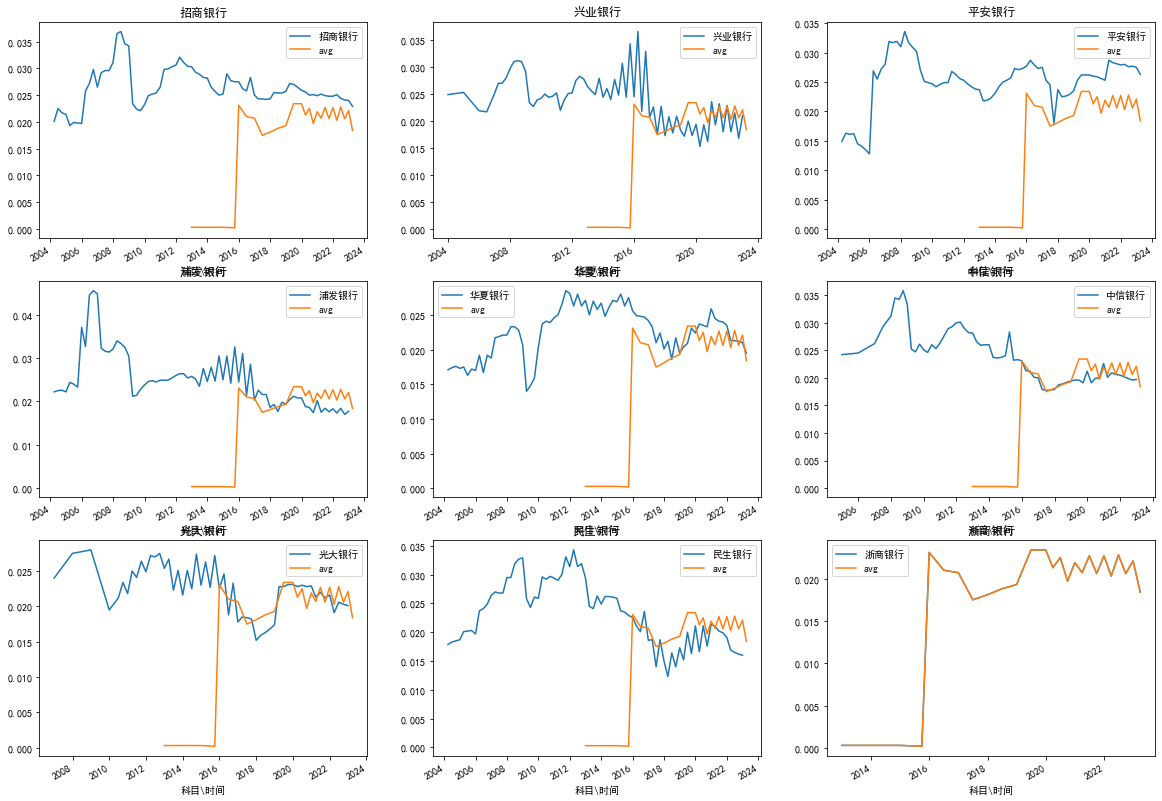

In [260]:
#基于df_all绘制净息差图，其中x轴为科目\时间，y轴为净息差，legend为banknm,图形为折线图,3*3的图形矩阵，注意图的中文表头，宽度20，高度20，不显示横轴标签


import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for i,ax in enumerate(axes.flatten()):

    df_all[df_all["banknm"]==banknmlist[i]].plot(x="科目\时间",y="净息差",legend=banknmlist[i],label=banknmlist[i],ax=ax)
    df_all[df_all["banknm"]==banknmlist[-1]].plot(x="科目\时间",y="净息差",legend=banknmlist[i],label='avg',ax=ax)
    ax.set_title(banknmlist[i])
plt.show()

# 以上绘图，全部对标一下'banknm'="fieldavg"的净息差，作为参考





In [270]:
def convert_to_yi(x):
    if '万亿' in x:
        return float(x.replace('万', '').replace('亿', '')) * 10000
    elif '亿' in x:
        return float(x.replace('亿', '')) 
    elif '万' in x:
        return float(x.replace('万', '')) / 10000
    else:
        return float(x)
    
# convert_to_yi("36.357万亿")

# 清洗数据，将单位统一为亿，应用于存款总额列
df_all['deposit_cleaned'] = df_all['存款总额'].apply(convert_to_yi)
# df_all['amount_cleaned'] = df['amount_cleaned'].apply(convert_to_yi)

TypeError: argument of type 'bool' is not iterable